In [79]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading the dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
x = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [80]:
pd.DataFrame(x)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [81]:
pd.DataFrame(y)

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [82]:
full_data = pd.concat([x,y], axis=1)
full_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Text(0.5, 1.0, 'Distribution of Hours per Week')

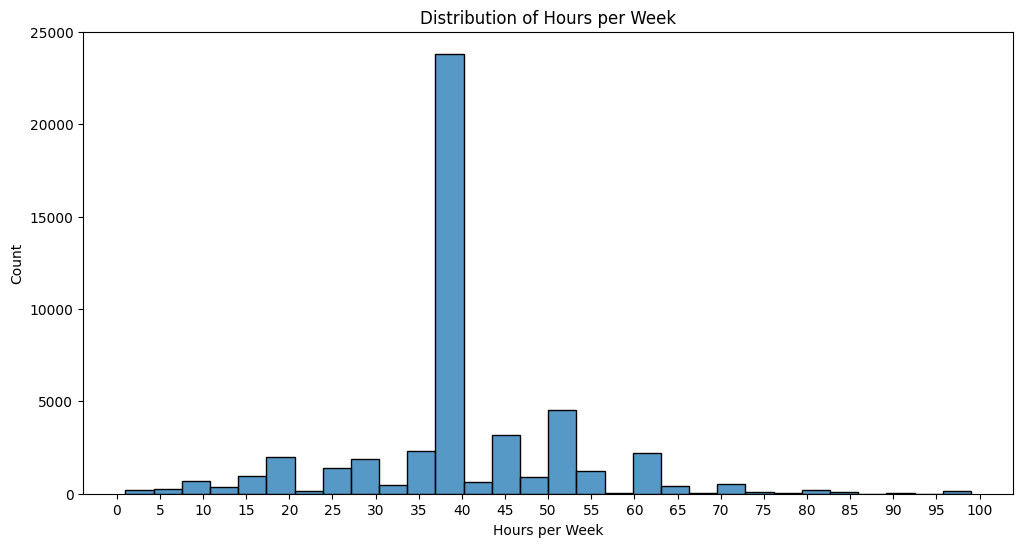

In [83]:
# Creating a historgram to show the distribution of hours per week
plt.figure(figsize=(12, 6))
sns.histplot(data=full_data, x='hours-per-week', bins=30, multiple='stack')
plt.xticks(np.arange(0, max(full_data['hours-per-week'])+5, 5))  # Set x-axis ticks every 5 hours
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.title('Distribution of Hours per Week')



Text(0.5, 1.0, 'Distribution of Income')

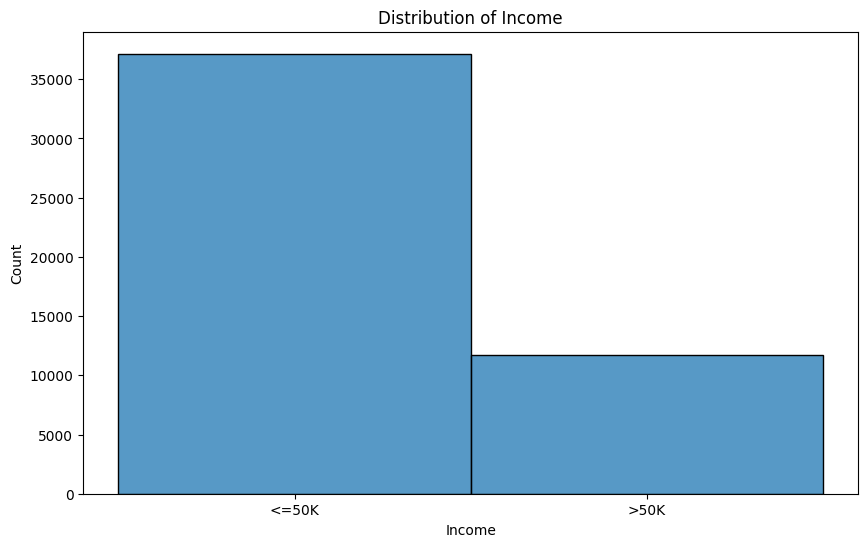

In [84]:
full_data['income'] = full_data['income'].str.replace('.', '')
full_data.head()
full_data['income'].value_counts()
full_data['income'].unique()
full_data['income'].nunique()

# Create a histogram with cleaned income data
plt.figure(figsize=(10, 6))
sns.histplot(data=full_data, x='income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')

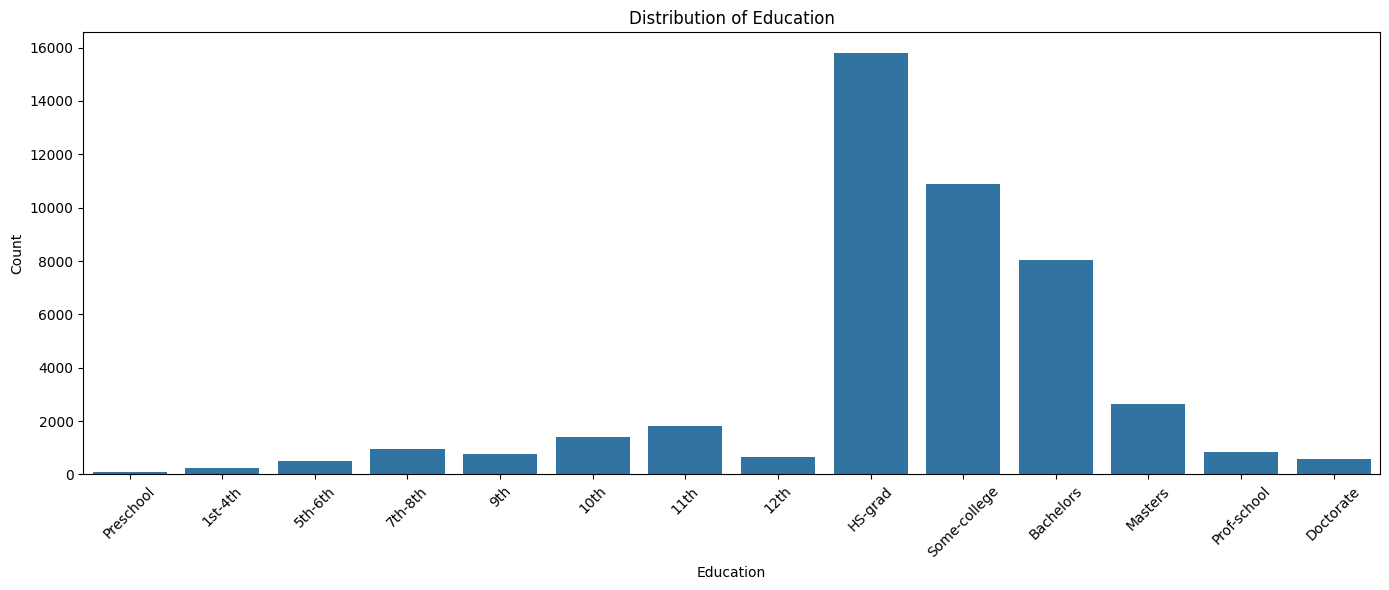

In [85]:
#Creating a countplot to show the education levels

education_level = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Bachelors', 'Masters','Prof-school', 'Doctorate' ]

plt.figure(figsize=(14, 6))
sns.countplot(data=full_data, x='education', order=education_level)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')
plt.xticks(rotation=45)
plt.tight_layout() 


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Handlers-cleaners'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Transport-moving'),
  Text(8, 0, 'Farming-fishing'),
  Text(9, 0, 'Machine-op-inspct'),
  Text(10, 0, 'Tech-support'),
  Text(11, 0, '?'),
  Text(12, 0, 'Protective-serv'),
  Text(13, 0, 'Armed-Forces'),
  Text(14, 0, 'Priv-house-serv')])

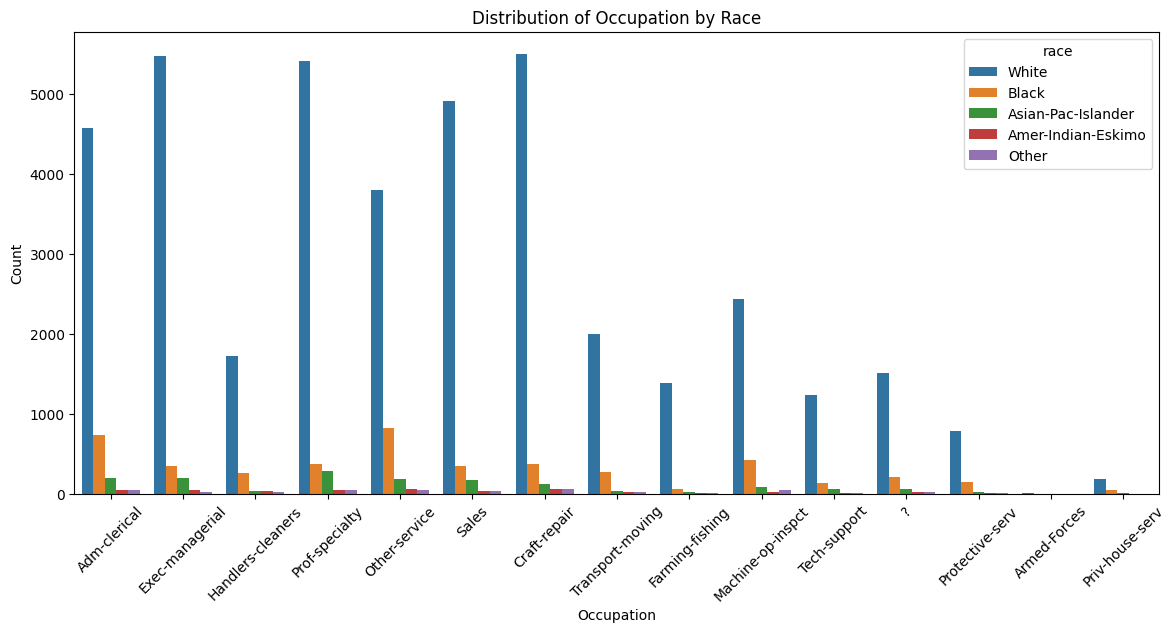

In [86]:
# Plotting the distrubution of occupation by race
plt.figure(figsize=(14, 6))
sns.countplot(data=full_data, x='occupation', hue='race')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of Occupation by Race')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Distribution of Hours per Week by Education')

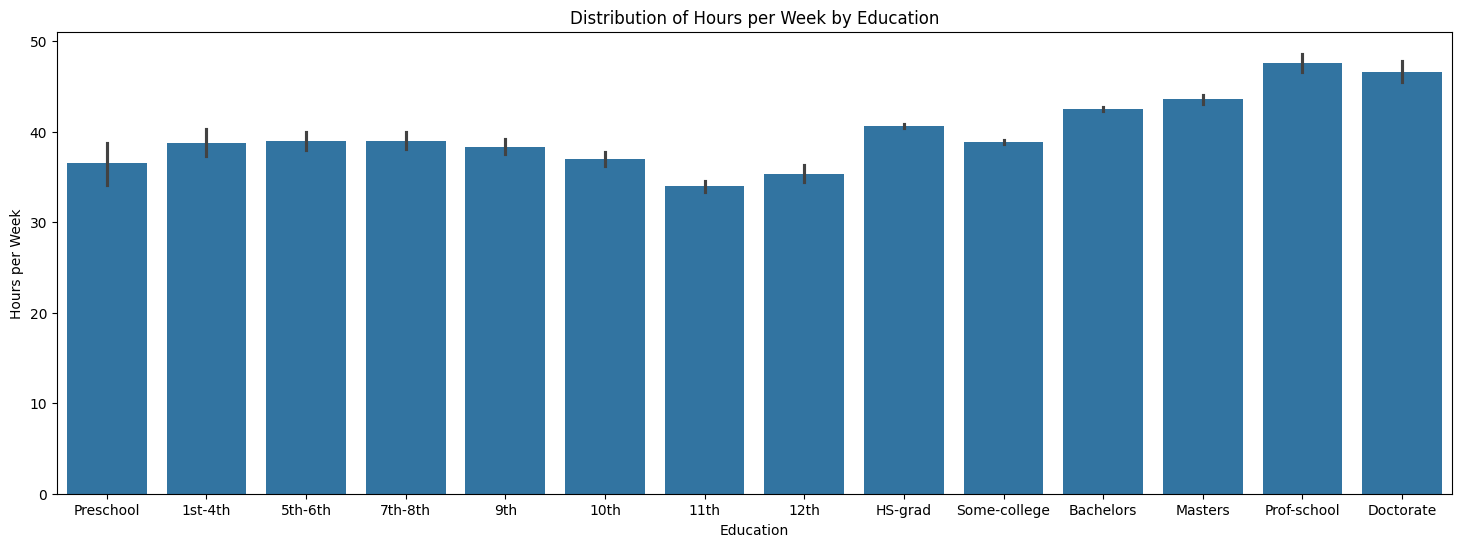

In [87]:
# Distribution of hours per week by education
plt.figure(figsize=(18, 6))
sns.barplot(data=full_data, x='education', y='hours-per-week', order=education_level)
plt.xlabel('Education')
plt.ylabel('Hours per Week')
plt.title('Distribution of Hours per Week by Education')



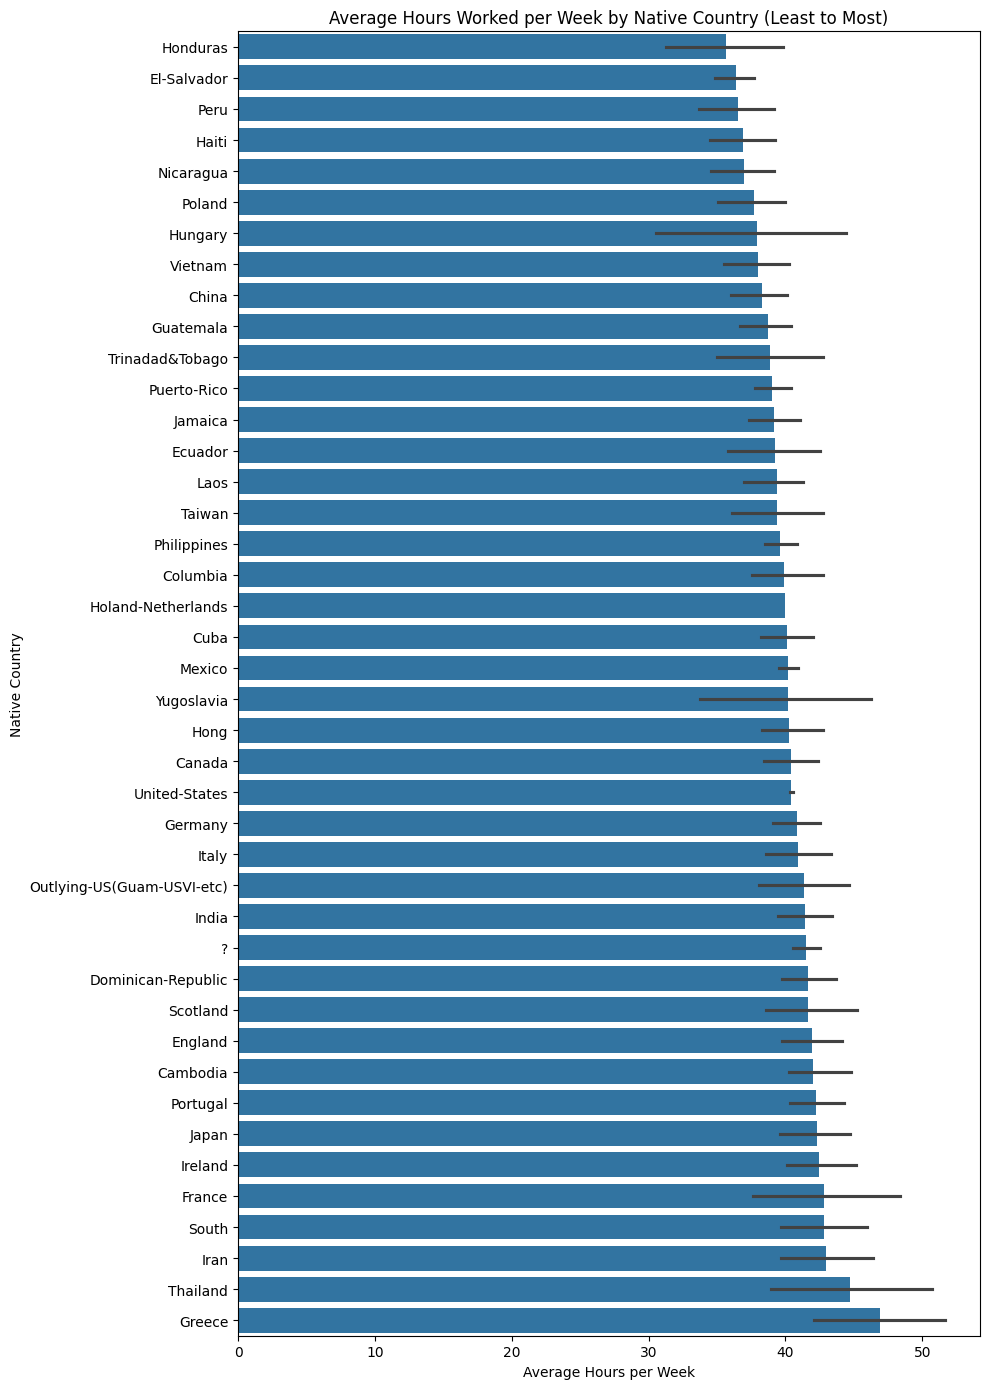

In [88]:
# Distribution of hours per week by native country
plt.figure(figsize=(10, 14))
# Calculate the average hours per week by native country and sort
country_hours = full_data.groupby('native-country')['hours-per-week'].mean().sort_values()
# Create a sorted barplot
sns.barplot(data=full_data, y='native-country', x='hours-per-week', 
            order=country_hours.index, orient='h')
plt.title('Average Hours Worked per Week by Native Country (Least to Most)')
plt.xlabel('Average Hours per Week')
plt.ylabel('Native Country')
plt.tight_layout()


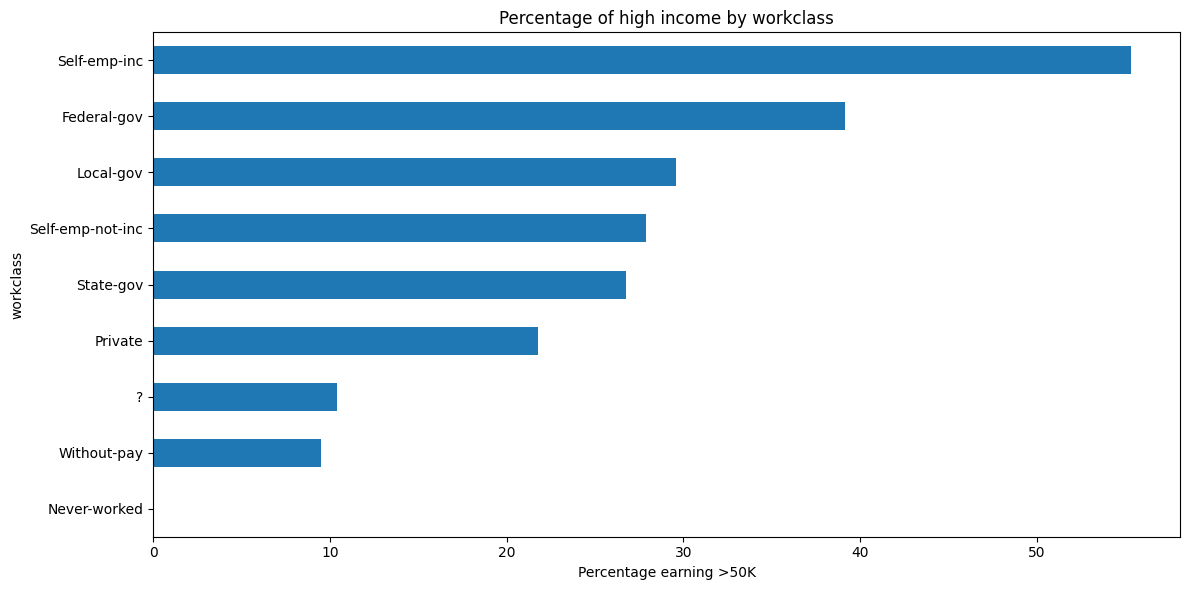

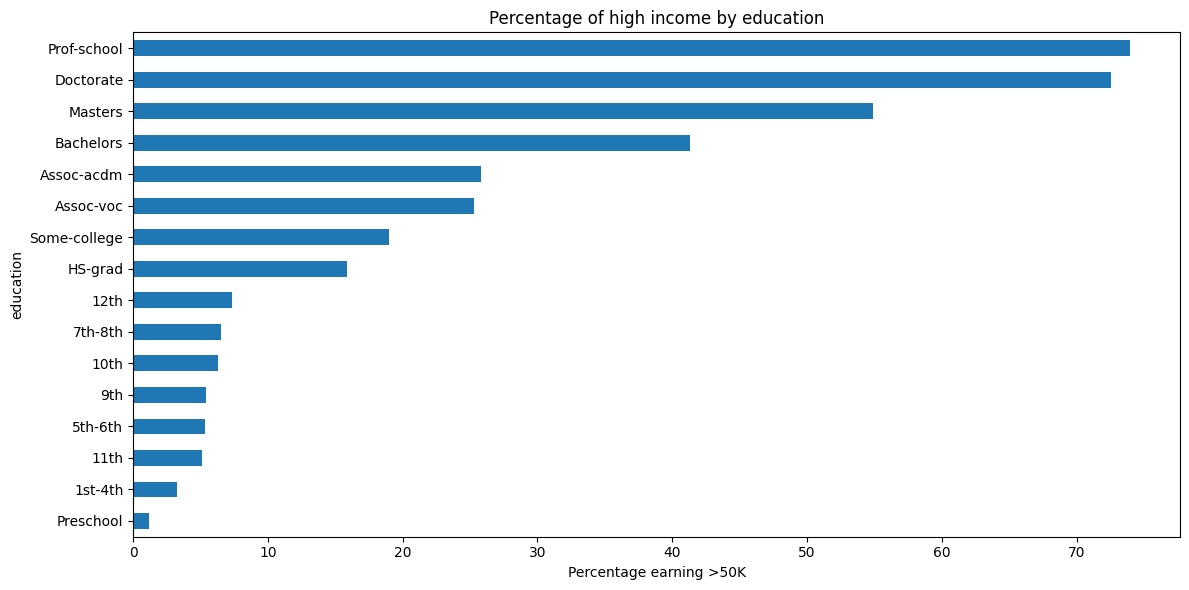

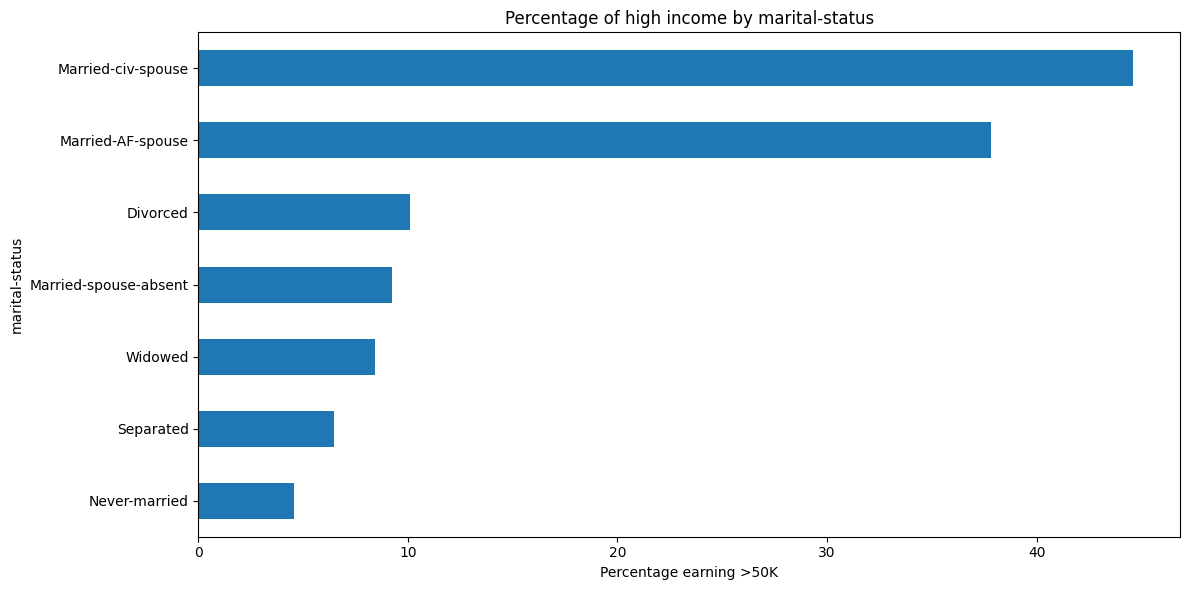

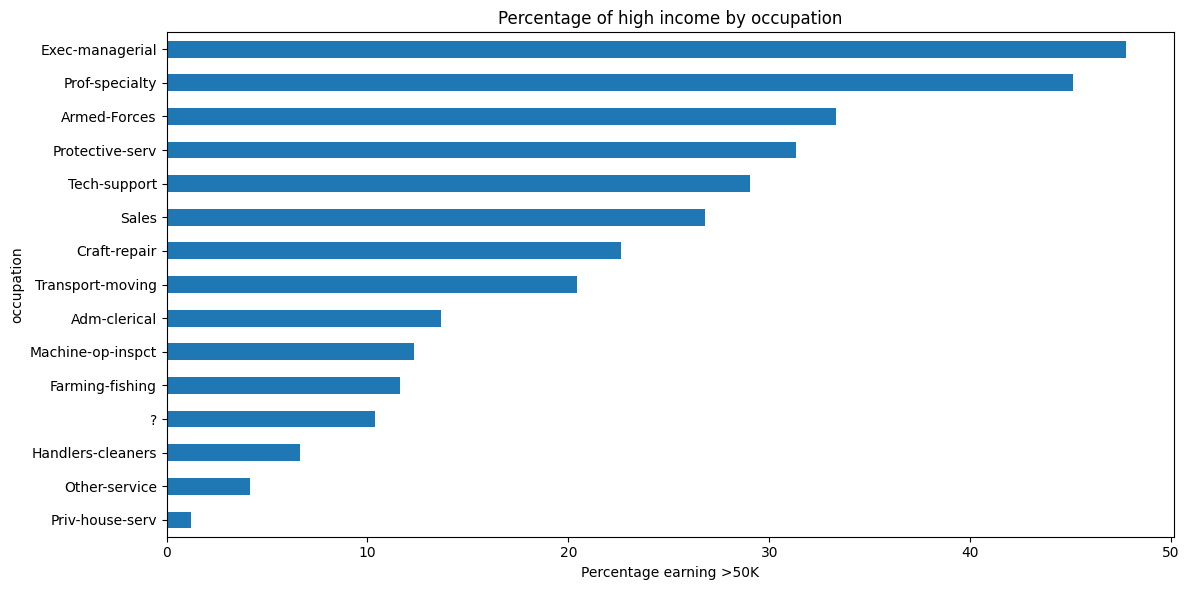

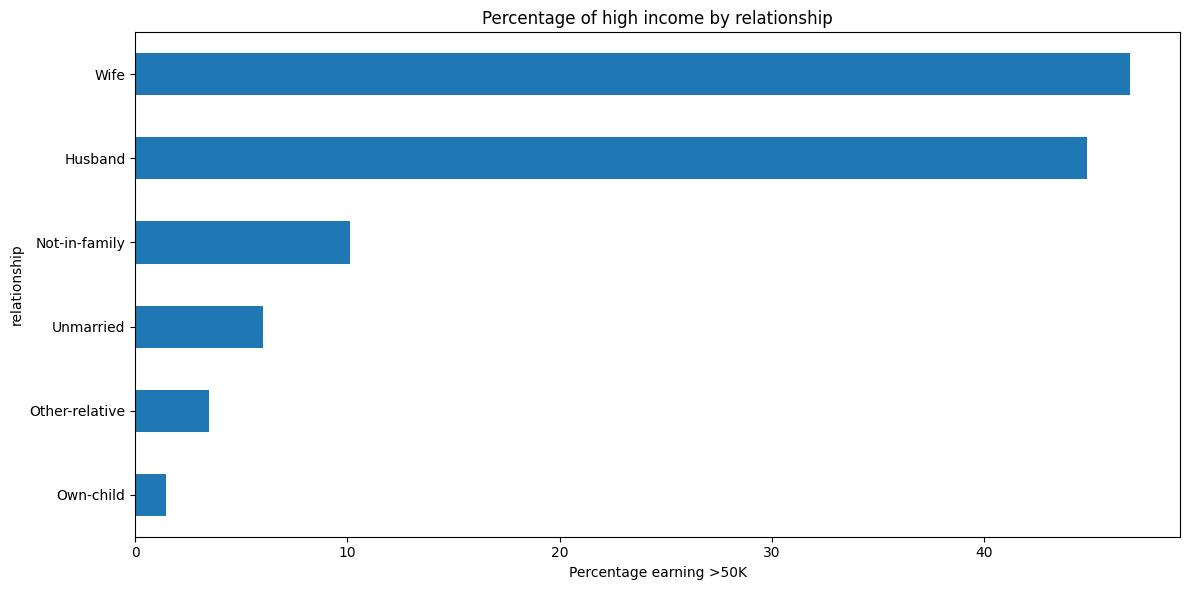

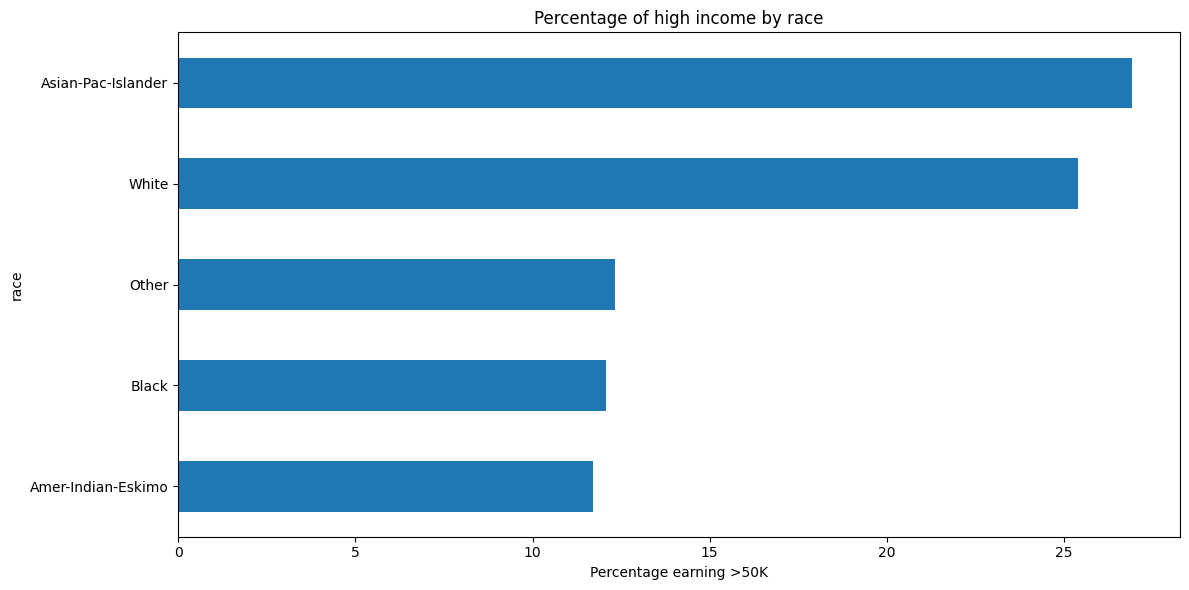

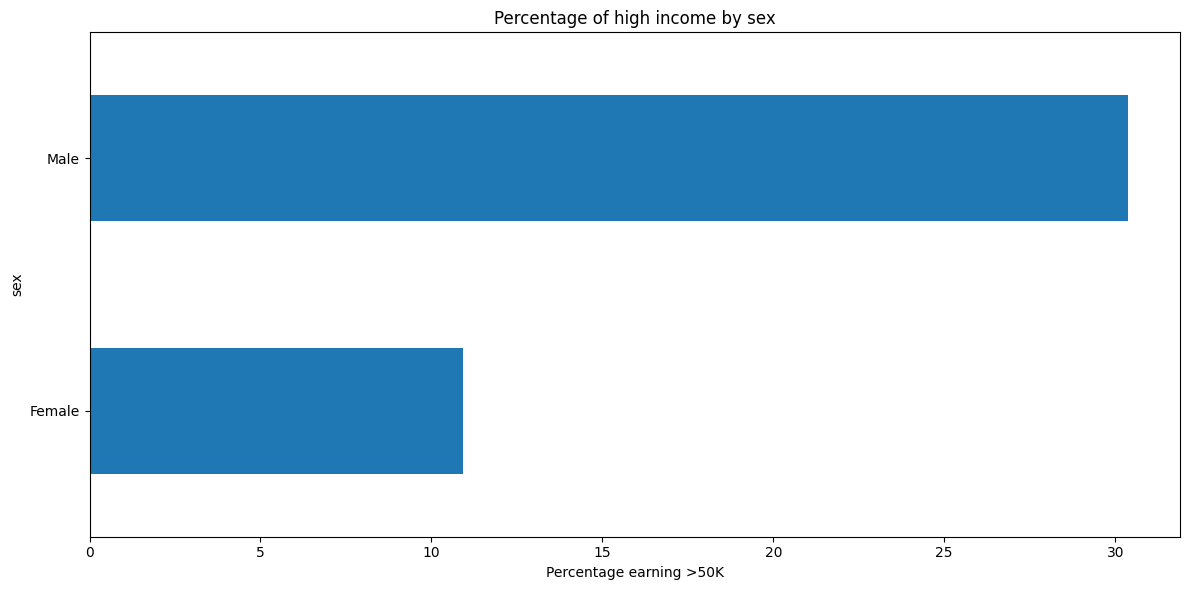

In [ ]:
# Analyze income proportion within different categorical features
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    income_prop = full_data.groupby(col)['income'].apply(lambda x: (x == '>50K').mean() * 100)
    income_prop.sort_values().plot(kind='barh')
    plt.xlabel('Percentage earning >50K')
    plt.ylabel(col)
    plt.title(f'Percentage of high income by {col}')
    plt.tight_layout()
    plt.show()

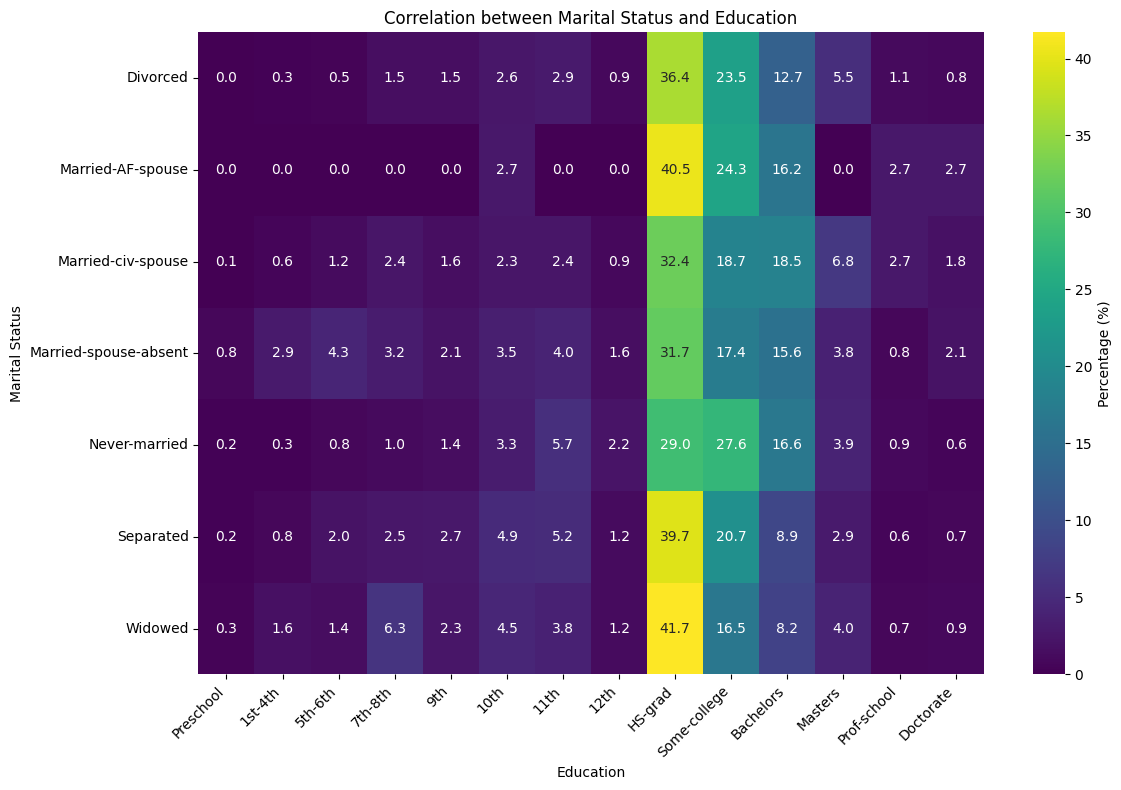

In [90]:
# Coorelation of maritaal status and education
plt.figure(figsize=(12, 8))
crosstab = pd.crosstab(full_data['marital-status'], full_data['education'])
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

crosstab_pct = crosstab_pct[education_level]

# Create a heatmap which is better for showing correlations between categorical variables
sns.heatmap(crosstab_pct, annot=True, cmap='viridis', fmt='.1f', cbar_kws={'label': 'Percentage (%)'})
plt.xlabel('Education')
plt.ylabel('Marital Status')
plt.title('Correlation between Marital Status and Education')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

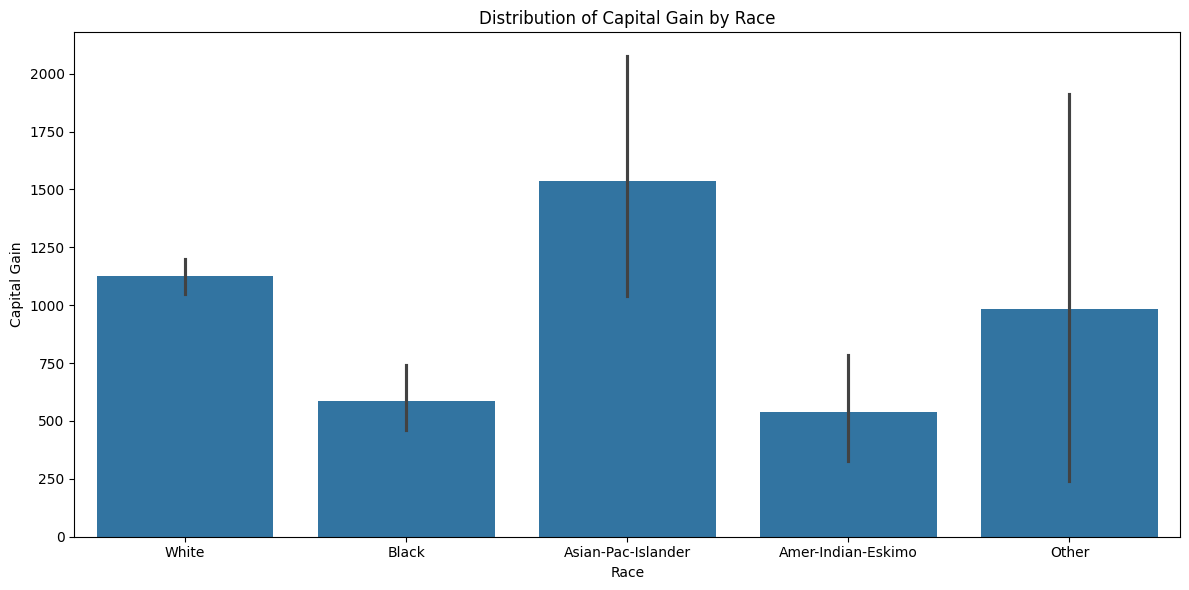

In [91]:
# Ditribution of capital gain by race
plt.figure(figsize=(12, 6))
sns.barplot(data=full_data, x='race', y='capital-gain')
plt.xlabel('Race')
plt.ylabel('Capital Gain')
plt.title('Distribution of Capital Gain by Race')
plt.tight_layout()

# Hypothesis 1

Based on the previous data, I hypothesize that individuals working in Exec-managerial roles are older than those working in other roles.

# Hypothesis 2

I hypothesize that there exists a critical threshold of education years above which the probability of earning >$50K increases dramatically.

# Hypothesis 1 Testing

Executive-Managerial Mean Age: 42.20
Other Occupations Mean Age: 38.14
Executive-Managerial Median Age: 41.0
Other Occupations Median Age: 36.0


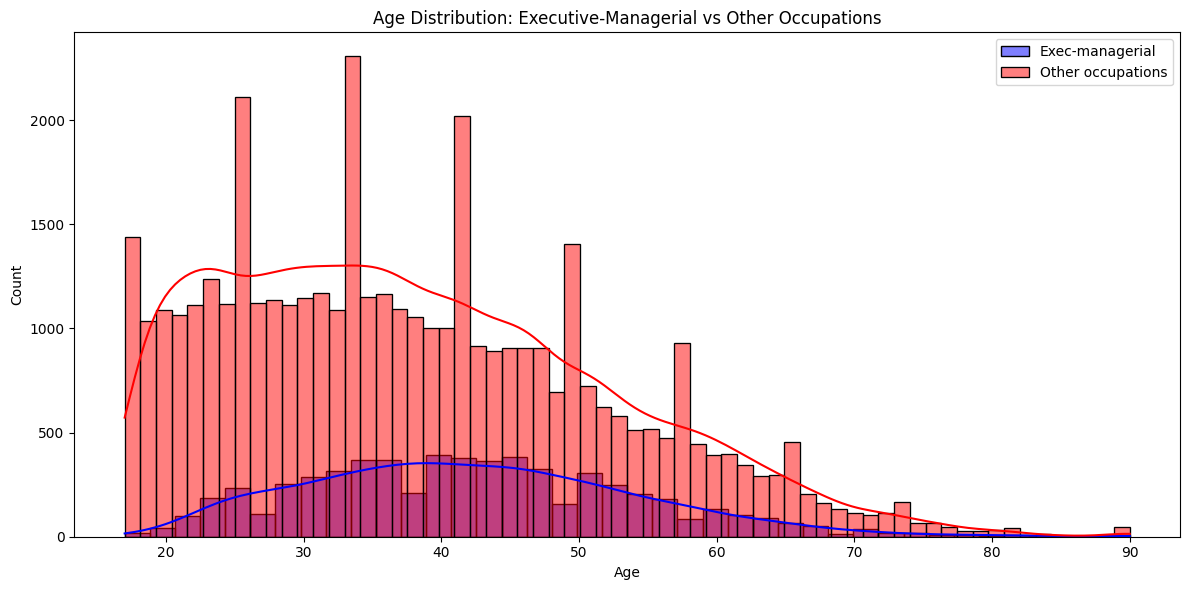

T-statistic: 24.1483
P-value: 0.00000000
Conclusion: We reject the null hypothesis.
There is a statistically significant difference in age between executive-managerial workers and others.
Executive-managerial workers are indeed older on average than workers in other occupations.


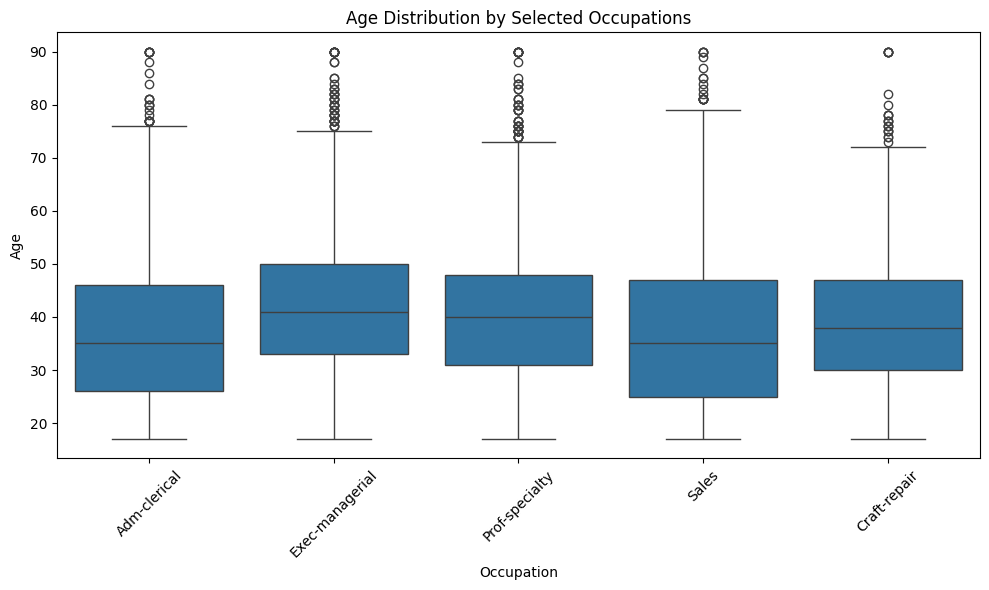

In [92]:
# Extract the age data for executive-managerial and other occupations
exec_managerial_ages = full_data[full_data['occupation'] == 'Exec-managerial']['age']
other_occupations_ages = full_data[full_data['occupation'] != 'Exec-managerial']['age']

# Calculate descriptive statistics
exec_mean = exec_managerial_ages.mean()
other_mean = other_occupations_ages.mean()
exec_median = exec_managerial_ages.median()
other_median = other_occupations_ages.median()

# Print the statistics
print(f"Executive-Managerial Mean Age: {exec_mean:.2f}")
print(f"Other Occupations Mean Age: {other_mean:.2f}")
print(f"Executive-Managerial Median Age: {exec_median}")
print(f"Other Occupations Median Age: {other_median}")

# Visualize the age distributions
plt.figure(figsize=(12, 6))
sns.histplot(exec_managerial_ages, kde=True, color='blue', alpha=0.5, label='Exec-managerial')
sns.histplot(other_occupations_ages, kde=True, color='red', alpha=0.5, label='Other occupations')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution: Executive-Managerial vs Other Occupations')
plt.legend()
plt.tight_layout()
plt.show()

# Perform statistical test (t-test) to compare means
from scipy import stats

t_stat, p_value = stats.ttest_ind(exec_managerial_ages, other_occupations_ages, equal_var=False)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.8f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Conclusion: We reject the null hypothesis.")
    print("There is a statistically significant difference in age between executive-managerial workers and others.")
    if exec_mean > other_mean:
        print("Executive-managerial workers are indeed older on average than workers in other occupations.")
    else:
        print("Executive-managerial workers are actually younger on average than workers in other occupations.")
else:
    print("Conclusion: We fail to reject the null hypothesis.")
    print("There is no statistically significant difference in age between executive-managerial workers and others.")

# Create a box plot to visualize the difference
plt.figure(figsize=(10, 6))
sns.boxplot(x='occupation', y='age', data=full_data[full_data['occupation'].isin(['Exec-managerial', 'Adm-clerical', 'Sales', 'Prof-specialty', 'Craft-repair'])])
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.title('Age Distribution by Selected Occupations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Hypothesis 1 Results

Based on the t-test results and the graphs, I can conclude that there is a statistically significant difference in age between executive-managerial workers and others. Executive-managerial workers are indeed older on average than workers in other occupations.

# Hypothesis 2 Testing

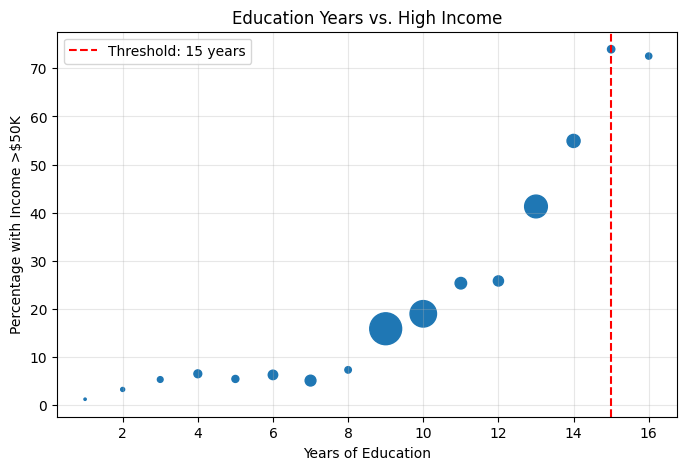

The education threshold appears to be 15 years


In [93]:
# Finding the education threshold and visualizing the relationship
# Create binary income variable and calculate percentage by education year
full_data['high_income'] = (full_data['income'] == '>50K').astype(int)
education_stats = full_data.groupby('education-num')['high_income'].agg(['mean', 'count'])
education_stats['percent'] = education_stats['mean'] * 100

# Plot the relationship
plt.figure(figsize=(8, 5))
plt.scatter(education_stats.index, education_stats['percent'], s=education_stats['count']/30)
plt.xlabel('Years of Education')
plt.ylabel('Percentage with Income >$50K')
plt.title('Education Years vs. High Income')
plt.grid(alpha=0.3)

# Find where the biggest jump occurs (our threshold)
education_sorted = education_stats.sort_index()
education_sorted['percent_change'] = education_sorted['percent'].diff()
threshold = education_sorted['percent_change'].idxmax()
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold: {threshold} years')
plt.legend()
plt.show()

print(f"The education threshold appears to be {threshold} years")

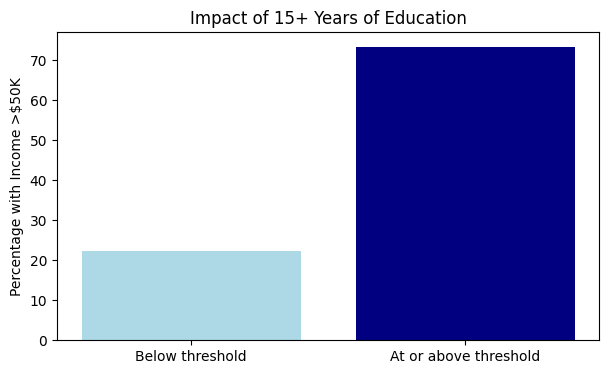

Below threshold: 22.4% earn >$50K
At/above threshold: 73.4% earn >$50K
Difference: 51.0 percentage points
P-value: 0.00000000
Significant difference detected


In [94]:
# Compare below vs. above threshold
below = full_data[full_data['education-num'] < threshold]['high_income']
above = full_data[full_data['education-num'] >= threshold]['high_income']

# Simple visualization
groups = ['Below threshold', 'At or above threshold']
values = [below.mean()*100, above.mean()*100]
plt.figure(figsize=(7, 4))
plt.bar(groups, values, color=['lightblue', 'navy'])
plt.ylabel('Percentage with Income >$50K')
plt.title(f'Impact of {threshold}+ Years of Education')
plt.show()

# Basic statistical test
from scipy import stats
_, p_value = stats.ttest_ind(below, above)
print(f"Below threshold: {values[0]:.1f}% earn >$50K")
print(f"At/above threshold: {values[1]:.1f}% earn >$50K")
print(f"Difference: {values[1]-values[0]:.1f} percentage points")
print(f"P-value: {p_value:.8f}")
print(f"{'Significant difference detected' if p_value < 0.05 else 'No significant difference'}")

# Hypothesis 2 Results

Based on the graphs and the statistical test, we can conclude that there is a critical threshold of education years above which the probability of earning >$50K increases dramatically. The threshold was found to be 15 years of education (Master's degree). I'd like to note thought that this dataset is not very large, so the results may not be as accurate as they could be.